In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('green_tech_data.csv')
df

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0
...,...,...,...,...,...
95,222.828459,414.288617,0.522243,4.688408,0
96,232.956490,753.360111,0.769994,4.362857,0
97,199.639356,907.399234,0.215821,2.430473,0
98,58.896694,898.377782,0.622890,3.878920,0


In [3]:
print(df.isnull().sum())

carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustainability        0
dtype: int64


In [4]:
df['sustainability'].value_counts()

,count
sustainability,
0,85
1,15


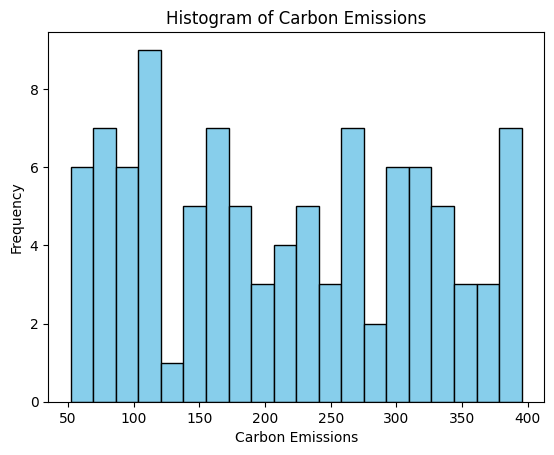

In [8]:
plt.hist(df['carbon_emissions'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Carbon Emissions')
plt.xlabel('Carbon Emissions')
plt.ylabel('Frequency')
plt.show()


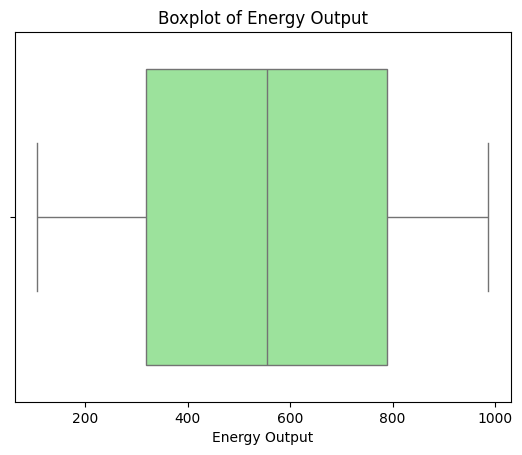

In [11]:
import seaborn as sns
sns.boxplot(x=df['energy_output'], color='lightgreen')
plt.title('Boxplot of Energy Output')
plt.xlabel('Energy Output')
plt.show()


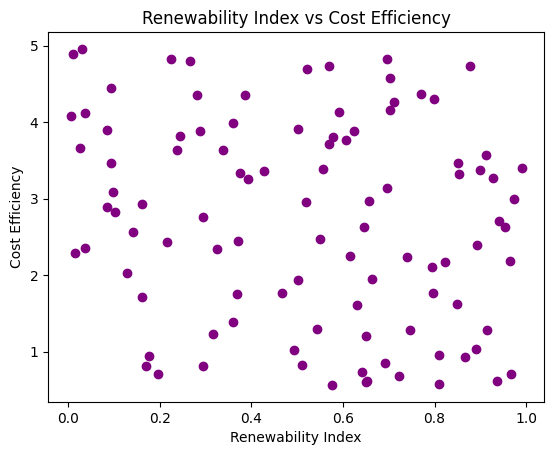

In [14]:
plt.scatter(df['renewability_index'], df['cost_efficiency'], color='purple')
plt.title('Renewability Index vs Cost Efficiency')
plt.xlabel('Renewability Index')
plt.ylabel('Cost Efficiency')
plt.show()


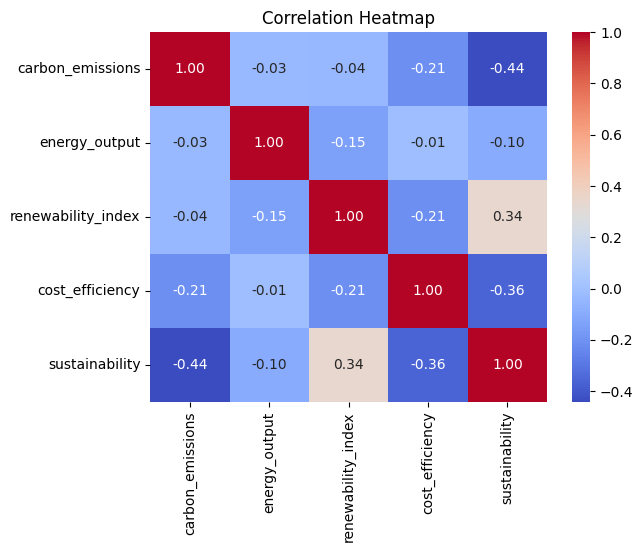

In [15]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


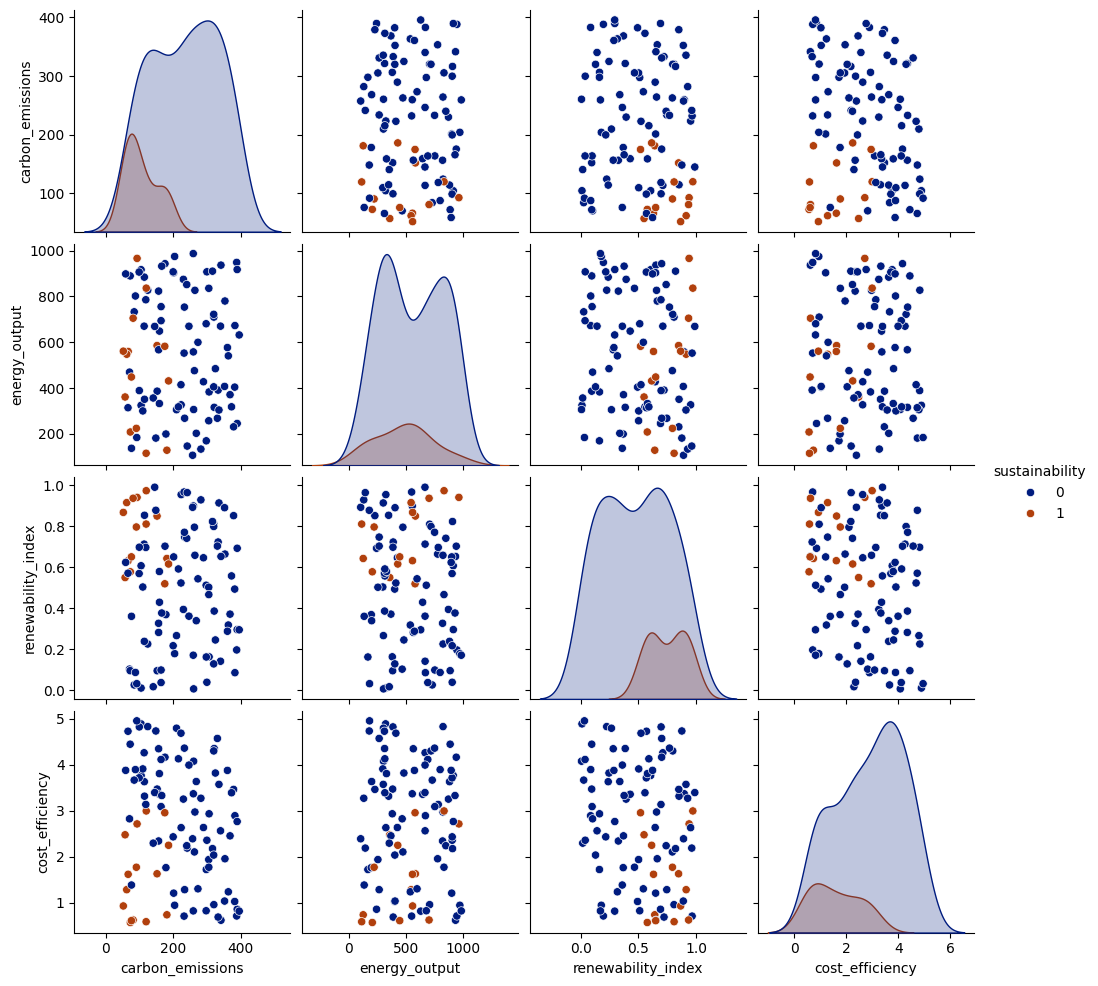

In [19]:
sns.pairplot(df, hue='sustainability', palette='dark')
plt.show()


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
model = LogisticRegression()

In [34]:
x = df[['carbon_emissions','renewability_index','cost_efficiency']]
y = df['sustainability']

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
model.fit(x_train,y_train)

LogisticRegression()

In [37]:
y_pred = model.predict(x_test)

In [38]:
model_score = model.score(x_test,y_test)
print(model_score)

0.95


In [39]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.95


In [40]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[17  0]
 [ 1  2]]


In [42]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.67      0.80         3

    accuracy                           0.95        20
   macro avg       0.97      0.83      0.89        20
weighted avg       0.95      0.95      0.95        20



In [43]:
import joblib
joblib.dump(model,'sustainability_model.pkl')

['sustainability_model.pkl']

In [44]:
#load the model
model = joblib.load('sustainability_model.pkl')

In [48]:


# Load the model if it's not already loaded

# Create sample new data if needed
new_data = pd.DataFrame({
    'carbon_emissions': [0.5, 0.2, 0.8],
    'renewability_index': [0.9, 0.7, 0.3],
    'cost_efficiency': [0.8, 0.6, 0.4]
})

predictions  = model.predict(new_data)
print(f"Prediction: {predictions}")
probabilities = model.predict_proba(new_data)
print(f"Probabilities: {probabilities}")

Prediction: [1 1 1]
Probabilities: [[0.01338738 0.98661262]
 [0.01311656 0.98688344]
 [0.01627451 0.98372549]]
